In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
data_wine = pd.read_csv('winequality-red2.csv')
print(data_wine.shape)
data_wine.info()
data_wine.head()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
data_wine.drop(['chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates'], axis=1, inplace=True)
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     1599 non-null   float64
 1   volatile acidity  1599 non-null   float64
 2   citric acid       1599 non-null   float64
 3   residual sugar    1599 non-null   float64
 4   density           1599 non-null   float64
 5   alcohol           1599 non-null   float64
 6   quality           1599 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 87.6 KB


In [14]:
Y = data_wine['quality']
X = data_wine.drop(columns=['quality'], axis=1, inplace=False)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predice = lr.predict(X_test)
mse = mean_squared_error(Y_test, Y_predice)
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test, Y_predice)
print(f"mse : {mse}, rmse : {rmse} ,r2_value : {r2_value}")
print(f"Y절편의 값={lr.intercept_}")
print(f"회귀계수의 값=\n{pd.Series(data=np.round(lr.coef_,2),index=X.columns)}")

mse : 0.4230810660732082, rmse : 0.6504468203267721 ,r2_value : 0.2829134473335453
Y절편의 값=12.230139671279463
회귀계수의 값=
fixed acidity       0.06
volatile acidity   -1.52
citric acid        -0.23
residual sugar      0.00
density            -9.46
alcohol             0.31
dtype: float64


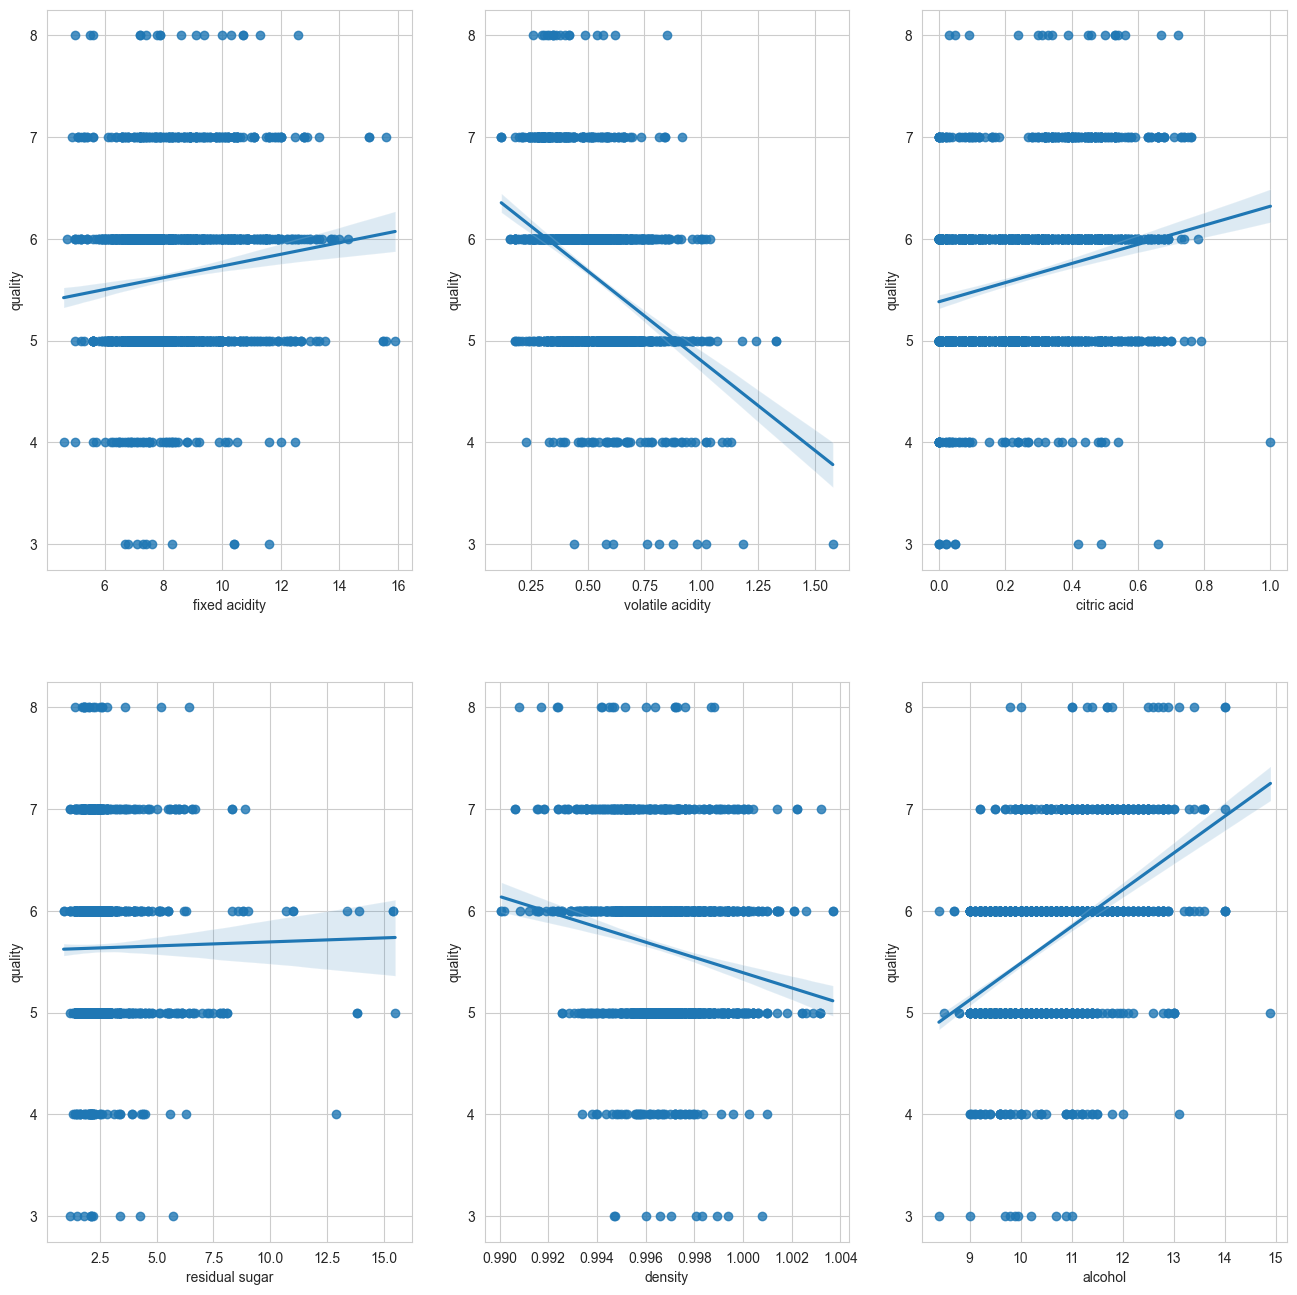

In [21]:
fig, axs = plt.subplots(figsize = (16,16), ncols = 3, nrows = 2)
x_features = data_wine.drop(columns=['quality'], axis=1, inplace=False)
for i, feature in enumerate(x_features.columns):
    row = int(i/3)
    col = i % 3
    sns.regplot(x = feature, y = "quality", data = data_wine, ax = axs[row,col])